# Water Quality Prediction

## About Dataset

#### Context
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

#### Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

##### 1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

##### 2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

##### 3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

##### 4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

##### 5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

##### 6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

##### 7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

##### 8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

##### 9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

##### 10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.
(0) Water is not safe to drink and (1) Water is safe to drink

## Data Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\pc\Downloads\water_potability (1).csv")
df

ph    Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246         NaN   
2     8.099124  224.236259  19909.54173     9.275884         NaN   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436525       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459761       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [3]:
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

# Exploratory Data Analysis

In [4]:
df.shape

(3276, 10)

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

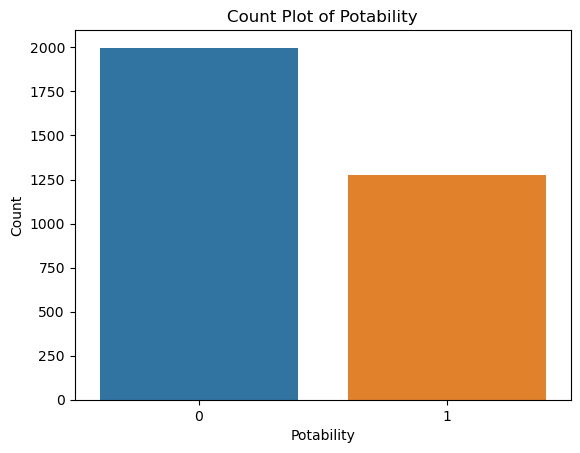

In [11]:
# Assuming df is your DataFrame
sns.countplot(x='Potability', data=df)

# Add labels and title (optional)
plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Count Plot of Potability')

# Show the plot
plt.show()

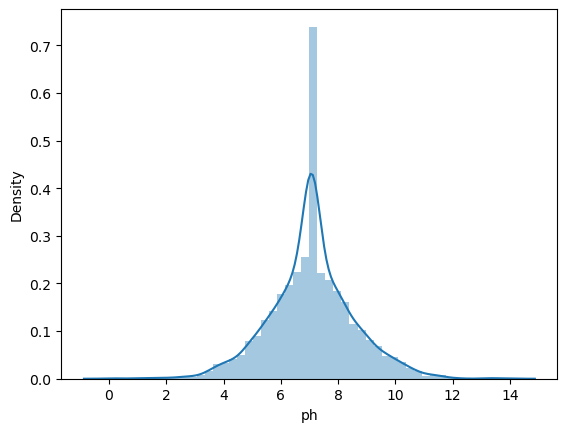

In [12]:
sns.distplot(df['ph'])
plt.show()

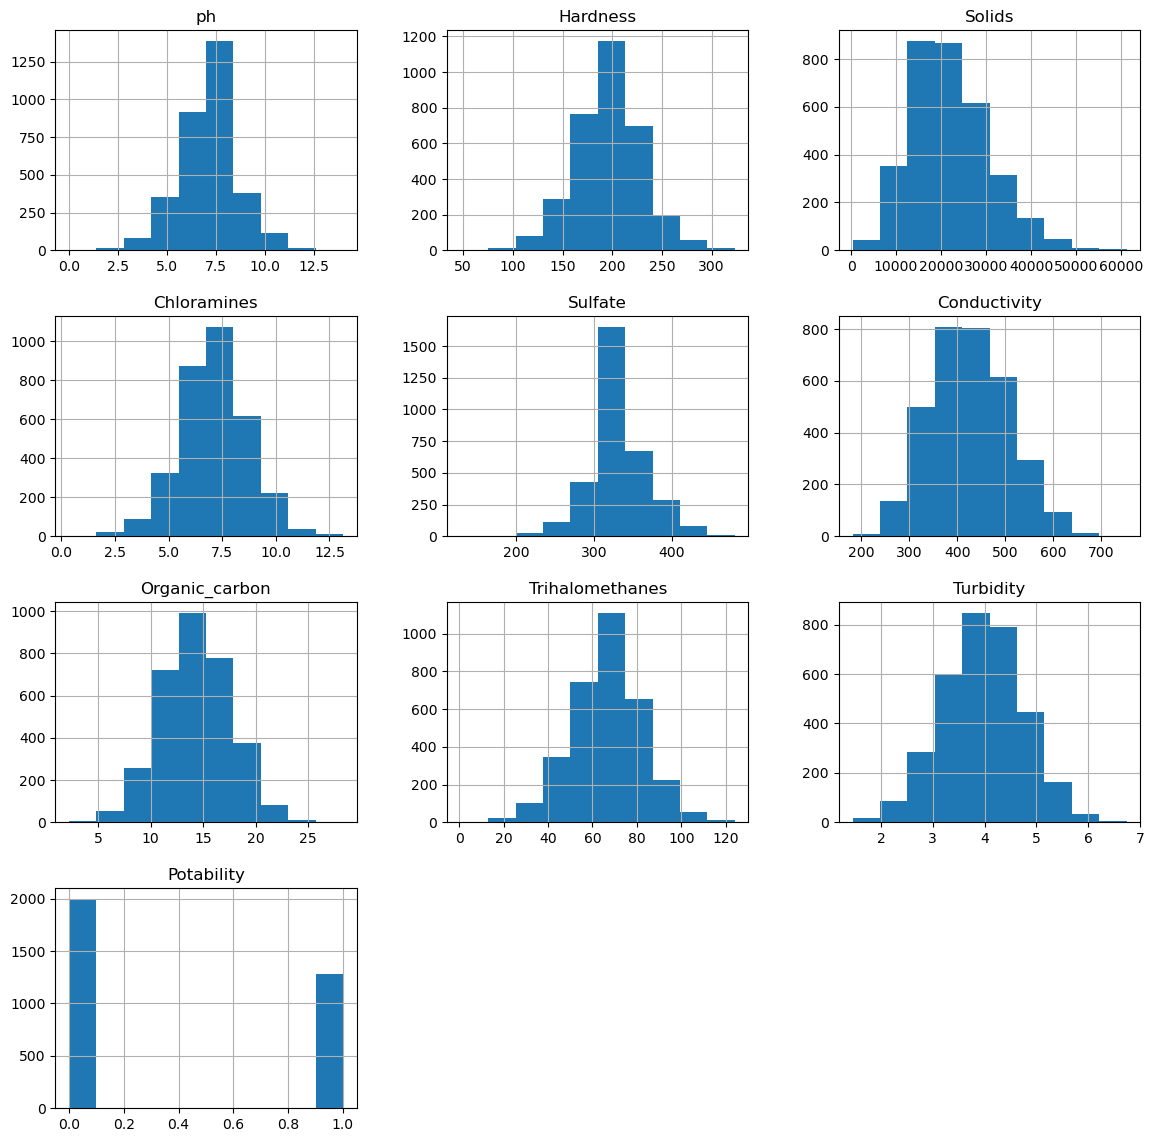

In [13]:
df.hist(figsize=(14,14))
plt.show()

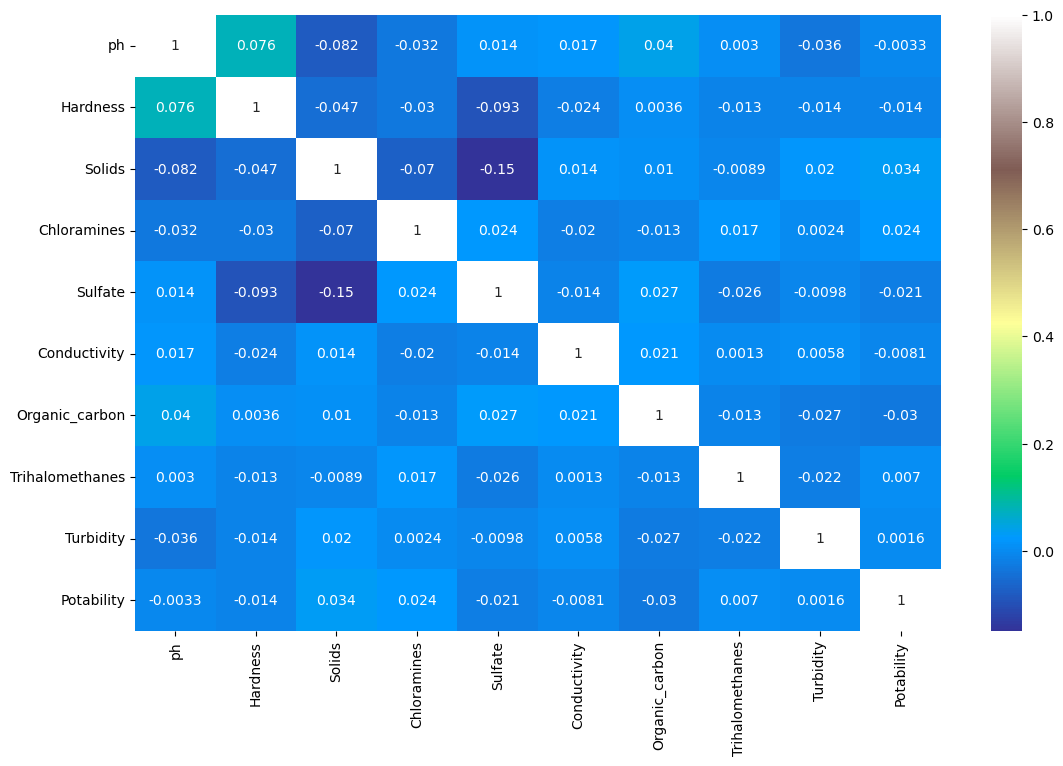

In [14]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

<Axes: >

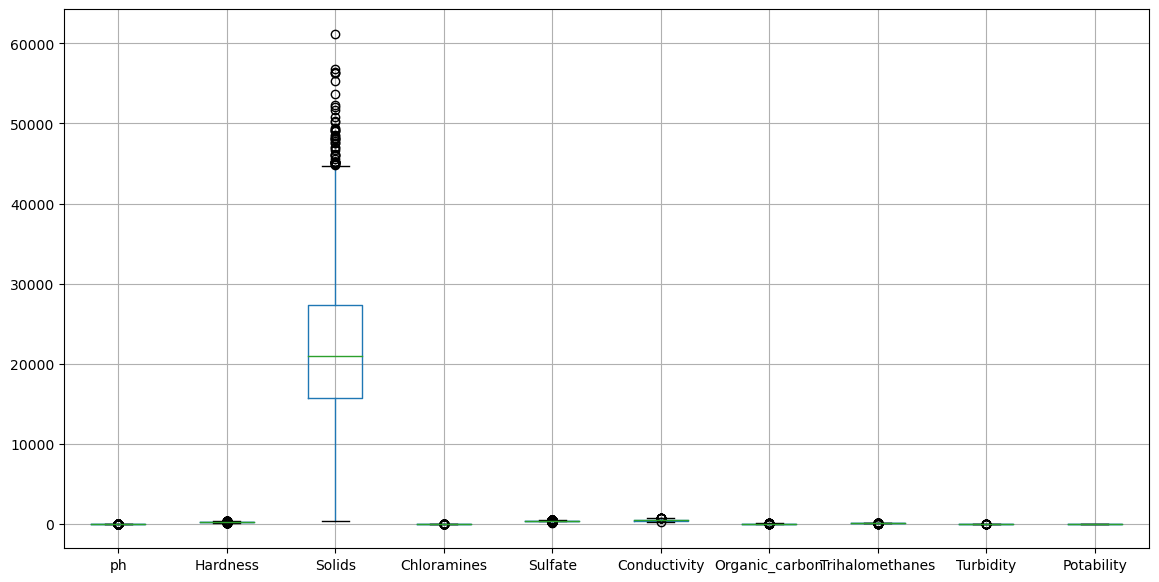

In [15]:
df.boxplot(figsize=(14,7))

In [16]:
X = df.drop('Potability',axis=1)
Y= df['Potability']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

In [18]:
# Dictionary to store model performance metrics
model_metrics = {}

### Logistic Regression

In [19]:
# Import the necessary library
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, Y_train)  # Note: Ensure that the target variable is named correctly (y_train)

# Make predictions
Y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.6128048780487805
Confusion Matrix:
[[402   0]
 [254   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       402
           1       0.00      0.00      0.00       254

    accuracy                           0.61       656
   macro avg       0.31      0.50      0.38       656
weighted avg       0.38      0.61      0.47       656



## Train Decision Tree Classifier and check accuracy

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=10)

In [22]:
prediction=dt.predict(X_test)
print(f"Accuracy Score = {accuracy_score(Y_test,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")


Accuracy Score = 58.6890243902439
Confusion Matrix =
 [[274 128]
 [143 111]]
Classification Report =
               precision    recall  f1-score   support

           0       0.66      0.68      0.67       402
           1       0.46      0.44      0.45       254

    accuracy                           0.59       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.58      0.59      0.58       656



### Random Forest Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = rf_classifier.predict(X_test)

In [24]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6783536585365854
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       412
           1       0.61      0.38      0.47       244

    accuracy                           0.68       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656



### K-nearest neighbors Classifier model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = knn_classifier.predict(X_test)

In [26]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.5411585365853658
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.72      0.66       412
           1       0.34      0.25      0.29       244

    accuracy                           0.54       656
   macro avg       0.48      0.48      0.47       656
weighted avg       0.51      0.54      0.52       656



### Extra Trees Classifier

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
# Initialize the Extra Trees Classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
extra_trees_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = extra_trees_classifier.predict(X_test)

In [28]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7027439024390244
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.92      0.80       412
           1       0.71      0.34      0.46       244

    accuracy                           0.70       656
   macro avg       0.71      0.63      0.63       656
weighted avg       0.71      0.70      0.67       656



### Adaboost Classifier

In [29]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
adaboost_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = adaboost_classifier.predict(X_test)

In [30]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6189024390243902
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.85      0.74       412
           1       0.47      0.23      0.31       244

    accuracy                           0.62       656
   macro avg       0.56      0.54      0.52       656
weighted avg       0.58      0.62      0.58       656



### Xgboost Classifier

In [31]:
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = xgb_classifier.predict(X_test)

In [32]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6554878048780488
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       412
           1       0.55      0.42      0.48       244

    accuracy                           0.66       656
   macro avg       0.62      0.61      0.61       656
weighted avg       0.64      0.66      0.64       656



In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)

# Store metrics
model_metrics['Decision Tree'] = {
    'Accuracy': metrics.accuracy_score(Y_test, Y_pred),
    'F1': metrics.f1_score(Y_test, Y_pred),
    'Recall': metrics.recall_score(Y_test, Y_pred),
    'Precision': metrics.precision_score(Y_test, Y_pred)
}

print(model_metrics['Decision Tree'])

{'Accuracy': 0.5823170731707317, 'F1': 0.46899224806201545, 'Recall': 0.4959016393442623, 'Precision': 0.44485294117647056}


In [39]:
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

# Store metrics
model_metrics['Logistic Regression'] = {
    'Accuracy': metrics.accuracy_score(Y_test, Y_pred),
    'F1': metrics.f1_score(Y_test, Y_pred),
    'Recall': metrics.recall_score(Y_test, Y_pred),
    'Precision': metrics.precision_score(Y_test, Y_pred)
}

print(model_metrics['Logistic Regression'])

{'Accuracy': 0.6280487804878049, 'F1': 0.0, 'Recall': 0.0, 'Precision': 0.0}


In [40]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=42)
rdf.fit(X_train, Y_train)
Y_pred = rdf.predict(X_test)

# Store metrics
model_metrics['Random Forest'] = {
    'Accuracy': metrics.accuracy_score(Y_test, Y_pred),
    'F1': metrics.f1_score(Y_test, Y_pred),
    'Recall': metrics.recall_score(Y_test, Y_pred),
    'Precision': metrics.precision_score(Y_test, Y_pred)
}

print(model_metrics['Random Forest'])

{'Accuracy': 0.6417682926829268, 'F1': 0.38320209973753283, 'Recall': 0.29918032786885246, 'Precision': 0.5328467153284672}


In [41]:
# Confusion matrix gives an overview about performance metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
print(metrics.classification_report(Y_test, Y_pred))
accuracy_score(Y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       412
           1       0.53      0.30      0.38       244

    accuracy                           0.64       656
   macro avg       0.60      0.57      0.57       656
weighted avg       0.62      0.64      0.61       656



0.6417682926829268

In [42]:
from sklearn.model_selection import cross_val_score
dt=RandomForestClassifier()
crossval=cross_val_score(dt,X,Y,cv=5)
print(crossval)
np.mean(crossval)

[0.6097561  0.65496183 0.65343511 0.58625954 0.66259542]


0.6334016011915844

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

# Store metrics
model_metrics['K-Nearest Neighbors'] = {
    'Accuracy': metrics.accuracy_score(Y_test, Y_pred),
    'F1': metrics.f1_score(Y_test, Y_pred),
    'Recall': metrics.recall_score(Y_test, Y_pred),
    'Precision': metrics.precision_score(Y_test, Y_pred)
}

print(model_metrics['K-Nearest Neighbors'])

{'Accuracy': 0.5411585365853658, 'F1': 0.28503562945368166, 'Recall': 0.2459016393442623, 'Precision': 0.3389830508474576}


In [44]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize and train the model
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(X_train, Y_train)
Y_pred = etc.predict(X_test)

# Store metrics
model_metrics['Extra Trees'] = {
    'Accuracy': metrics.accuracy_score(Y_test, Y_pred),
    'F1': metrics.f1_score(Y_test, Y_pred),
    'Recall': metrics.recall_score(Y_test, Y_pred),
    'Precision': metrics.precision_score(Y_test, Y_pred)
}

print(model_metrics['Extra Trees'])

{'Accuracy': 0.6905487804878049, 'F1': 0.428169014084507, 'Recall': 0.3114754098360656, 'Precision': 0.6846846846846847}


In [45]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train the model
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, Y_train)
Y_pred = ada.predict(X_test)

# Store metrics
model_metrics['AdaBoost'] = {
    'Accuracy': metrics.accuracy_score(Y_test, Y_pred),
    'F1': metrics.f1_score(Y_test, Y_pred),
    'Recall': metrics.recall_score(Y_test, Y_pred),
    'Precision': metrics.precision_score(Y_test, Y_pred)
}

print(model_metrics['AdaBoost'])

{'Accuracy': 0.6189024390243902, 'F1': 0.3055555555555556, 'Recall': 0.22540983606557377, 'Precision': 0.47413793103448276}


In [46]:
from xgboost import XGBClassifier
# Remove or replace invalid characters from feature names
X_train.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in X_train.columns]
X_test.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in X_test.columns]

# Check if the columns were renamed successfully
print(X_train.columns)

# Now, you can proceed with fitting the model again
xgb = XGBClassifier(n_estimators=100, random_state=0, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

# Store metrics
model_metrics['XGBoost'] = {
    'Accuracy': metrics.accuracy_score(Y_test, Y_pred),
    'F1': metrics.f1_score(Y_test, Y_pred),
    'Recall': metrics.recall_score(Y_test, Y_pred),
    'Precision': metrics.precision_score(Y_test, Y_pred)
}

print(model_metrics['XGBoost'])

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')
{'Accuracy': 0.6554878048780488, 'F1': 0.47685185185185186, 'Recall': 0.42213114754098363, 'Precision': 0.5478723404255319}


In [47]:
# Convert the dictionary to a DataFrame for better visualization
metrics_df = pd.DataFrame(model_metrics).T

# Display the table
print(metrics_df)

                     Accuracy        F1    Recall  Precision
Logistic Regression  0.628049  0.000000  0.000000   0.000000
Random Forest        0.641768  0.383202  0.299180   0.532847
Decision Tree        0.582317  0.468992  0.495902   0.444853
K-Nearest Neighbors  0.541159  0.285036  0.245902   0.338983
Extra Trees          0.690549  0.428169  0.311475   0.684685
AdaBoost             0.618902  0.305556  0.225410   0.474138
XGBoost              0.655488  0.476852  0.422131   0.547872


In [48]:
import joblib

# Save each model
joblib.dump(logreg, 'logistic_regression_model.pkl')
joblib.dump(dtc, 'decision_tree_model.pkl')
joblib.dump(rdf, 'random_forest_model.pkl')
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(etc, 'extra_trees_model.pkl')
joblib.dump(ada, 'adaboost_model.pkl')
joblib.dump(xgb, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [49]:
logreg = joblib.load('logistic_regression_model.pkl')
dtc = joblib.load('decision_tree_model.pkl')
rdf = joblib.load('random_forest_model.pkl')
knn = joblib.load('knn_model.pkl')
etc = joblib.load('extra_trees_model.pkl')
ada = joblib.load('adaboost_model.pkl')
xgb = joblib.load('xgboost_model.pkl')

print(dtc)
print(rdf)
print(knn)
print(etc)
print(ada)
print(xgb)

DecisionTreeClassifier(criterion='entropy', random_state=0)
RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)
KNeighborsClassifier()
ExtraTreesClassifier(random_state=0)
AdaBoostClassifier(n_estimators=100, random_state=0)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_stat

## Apply Hyper Parameter Tuning

In [58]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2,4,6,8,10,12,14]

# define grid search
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0)
grid_search_dt.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

### Deep Learning-Keras Binary Classification unsing Sequential Layers

In [59]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# Build the Keras Sequential model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_data=(X_test, Y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy}")

Epoch 1/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5659 - loss: 0.6954 - val_accuracy: 0.6402 - val_loss: 0.6624
Epoch 2/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6025 - loss: 0.6702 - val_accuracy: 0.6509 - val_loss: 0.6477
Epoch 3/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6270 - loss: 0.6560 - val_accuracy: 0.6494 - val_loss: 0.6371
Epoch 4/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6270 - loss: 0.6441 - val_accuracy: 0.6601 - val_loss: 0.6310
Epoch 5/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6459 - loss: 0.6325 - val_accuracy: 0.6616 - val_loss: 0.6251
Epoch 6/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6433 - loss: 0.6276 - val_accuracy: 0.6662 - val_loss: 0.6217
Epoch 7/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6686 - loss: 0.6147 - val_accuracy: 0.6616 - val_loss: 0.6214
Epoch 8/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6776 - loss: 0.6084 - val_accuracy: 0.

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6933 - loss: 0.6151 
Test Accuracy: 0.6829268336296082


In [61]:
# Predict and evaluate using classification report
Y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(Y_test, Y_pred))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       412
           1       0.60      0.45      0.51       244

    accuracy                           0.68       656
   macro avg       0.66      0.63      0.64       656
weighted avg       0.67      0.68      0.67       656



In [50]:
import pickle

In [52]:
filename='new_trained_model.sav'
pickle.dump(model_metrics['XGBoost'],open(filename,'wb'))

In [53]:
loaded_model=pickle.load(open('new_trained_model.sav','rb'))

In [54]:
import sklearn
print(sklearn.__version__)

1.2.2


In [55]:
for i in X.columns:
    print(X[i].value_counts())

ph
7.080795    491
8.554097      1
6.538084      1
5.915807      1
8.136498      1
           ... 
4.187491      1
7.808012      1
5.895949      1
7.269652      1
7.874671      1
Name: count, Length: 2786, dtype: int64
Hardness
204.890456    1
134.560276    1
170.190912    1
237.461099    1
171.238925    1
             ..
218.237187    1
208.374188    1
142.145566    1
179.799917    1
195.102299    1
Name: count, Length: 3276, dtype: int64
Solids
20791.31898    1
15979.33479    1
37000.95567    1
18736.19090    1
12289.90092    1
              ..
22824.69947    1
21809.70983    1
45141.68604    1
17037.72537    1
17404.17706    1
Name: count, Length: 3276, dtype: int64
Chloramines
7.300212     1
9.504361     1
6.217223     1
5.599870     1
10.786500    1
            ..
8.696479     1
5.846112     1
6.030640     1
6.378364     1
7.509306     1
Name: count, Length: 3276, dtype: int64
Sulfate
333.775777    781
280.745623      1
332.744519      1
391.918229      1
330.905370      1
       

In [56]:
X

ph    Hardness       Solids  Chloramines     Sulfate  \
0     7.080795  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246  333.775777   
2     8.099124  224.236259  19909.54173     9.275884  333.775777   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362  333.775777   
3273  9.419510  175.762646  33155.57822     7.350233  333.775777   
3274  5.126763  230.603758  11983.86938     6.303357  333.775777   
3275  7.874671  195.102299  17404.17706     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436525       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        66.396293   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459761       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

In [62]:
X.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436525       100.341674   4.628771  
4       11.558279        31.997993   4.075075

In [63]:
X.tail(30)

ph    Hardness        Solids  Chloramines     Sulfate  \
3246  10.667364  173.381945  28912.202200     7.071294  276.634391   
3247   8.628301  185.926723  31548.006460     7.079462  333.775777   
3248   6.260111  211.594112  18577.623970     7.154891  340.792574   
3249  10.808157  198.596751  29614.348790     5.782418  304.622061   
3250   7.371914  148.193698  42059.380420     7.966710  324.546262   
3251   4.825591  234.783904  11142.392630     6.442769  370.416831   
3252   4.868827  258.678959  13400.385530     4.880910  333.775777   
3253   7.395451  190.477892  22561.508310     8.310195  294.030395   
3254   8.862113  131.635177  17433.601850     7.639573  340.133165   
3255   6.008974  225.080234   5100.094173     7.452236  336.119000   
3256   7.607224  160.565253  39184.846720     7.826411  312.056066   
3257   6.683368  272.111698  18989.316770     5.336202  336.555100   
3258   6.638411  180.826667   9772.504814     8.295983  333.775777   
3259   9.271355  181.259617  16540.979050     7.022499  309.238865   
3260   7.080795  134.736856   9000.025591     9.026293  333.775777   
3261   3.629922  244.187391  24856.633210     6.618071  366.967873   
3262   8.378108  198.511213  28474.202580     6.477057  319.477187   
3263   6.923636  260.593154  24792.525620     5.501164  332.232177   
3264   5.893103  239.269482  20526.666160     6.349561  341.256362   
3265   8.197353  203.105091  27701.794050     6.472914  328.886838   
3266   8.372910  169.087052  14622.745490     7.547984  333.775777   
3267   8.989900  215.047358  15921.412020     6.297312  312.931021   
3268   6.702547  207.321086  17246.920350     7.708117  304.510230   
3269  11.491011   94.812545  37188.826020     9.263166  258.930600   
3270   6.069616  186.659040  26138.780190     7.747547  345.700257   
3271   4.668102  193.681736  47580.991600     7.166639  359.948574   
3272   7.808856  193.553212  17329.802160     8.061362  333.775777   
3273   9.419510  175.762646  33155.578220     7.350233  333.775777   
3274   5.126763  230.603758  11983.869380     6.303357  333.775777   
3275   7.874671  195.102299  17404.177060     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
3246    286.063394       17.685651        55.147364   4.135569  
3247    342.355698       18.248368        62.188687   5.100858  
3248    357.098395        7.992210        82.365378   5.403615  
3249    383.269410       14.902820        47.896406   4.362542  
3250    544.848432       17.166504        62.677756   4.338957  
3251    370.188948       13.046355        46.315992   3.463097  
3252    328.764529       17.352080        55.968217   3.255600  
3253    413.910293       13.301374        63.410178   4.990236  
3254    399.462844       16.712206        53.594104   4.955082  
3255    325.134492       11.079952        36.341012   4.012340  
3256    503.158078       13.366994        62.022308   3.525027  
3257    307.725009       20.178716        75.402260   5.208061  
3258    401.111143       12.601517        61.051889   5.164057  
3259    487.692788       13.228441        66.396293   4.333953  
3260    428.213987        8.668672        74.773392   3.699558  
3261    442.076337       13.302880        59.489294   4.754826  
3262    499.866994       15.389083        35.221200   4.524693  
3263    607.773567       15.483027        51.535867   4.013339  
3264    403.617560       18.963707        63.846319   4.390702  
3265    444.612724       14.250875        62.906205   3.361833  
3266    464.525552       11.083027        38.435151   4.906358  
3267    390.410231        9.899115        55.069304   4.613843  
3268    329.266002       16.217303        28.878601   3.442983  
3269    439.893618       16.172755        41.558501   4.369264  
3270    415.886955       12.067620        60.419921   3.669712  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        66.396293   2.798243  
3273    432.044783    

# Thank You !!!!!